import significa importar o llamar a numpy con su abreviatuta np
numpy es una librería, la librearía es un conjunto de herramientasque permite trabajar con matemática avanzada, especialmente arreglos y matrices.

In [1]:
import numpy as np

significa que se va importar el submodulo pyplot de la librería matplotlib y la va a llamar plt.

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import LocalOutlierFactor

“sklearn” significa (scikit-learn) es una librería de inteligencia artificial y machine learning.
Dentro de ella está el módulo “neighbors”.
Dentro de “neighbors” está la clase LocalOutlierFactor, que es un algoritmo que sirve para detectar puntos raros, también llamados outliers.
¿Qué es un outlier?
Un dato que “se sale del grupo”, que está lejos de los demás. Por ejemplo, si todos pesan 70–80 kilos y alguien pesa 200, es un outlier.

In [4]:
np.random.seed(42)

Este codigo significa que random de la libreria np genera un numero aleatorio diferente cada vez
y al usar random.seed este genera el mismo numero aleatorio siempre.

In [5]:
# Generamos los datos de entrenamiento

El símbolo # inicia un comentario, es decir: una nota para el humano, no para la computadora.
Aquí el comentario # Generamos los datos de entrenamiento No se ejecuta. Solo explica qué se hará en las siguientes líneas de codigo

In [6]:
X_inliers = 0.3 * np.random.randn(100, 2)

Con este codigo vamos a generar una matriz de (N° Filas, N° Columnas) con números aleatorios (previamente fijos con seed(42)).
Si usamos np.random.rand va a solicitar números aleatorios entre 0 y 1
y si usamos np.random.randn va a solicitar números aleatorios que siguen una distribución normal, Campana de Gauss
y X_inliers va a generar una matriz llamada X_inliers multiplicada por 0.3

In [7]:
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_inliers

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

Con este codigo vamos la matriz X_inliers.
Se van a tomar los valores originales de la matriz, y se los va a sumar 2.
Se van a tomar los valores originales de la metriz, y se los va a restar 2 .
Los valores sumados y restados se los va a unir en la matriz, teniendo el doble de datos.

In [8]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

np.random.uniform Es un generador de números aleatorios que elige valores entre dos límites:
Si se usa np.random.rand va a solicitar números aleatorios entre 0 y 1
Si se usa np.random.randn va a solicitar números aleatorios que siguen una distribución normal (Campana de Gauss)
Si se usa np.random.uniform va a solicitar números aleatorios entre un valor mínimo (low) y máximo (high)


In [9]:
X = np.r_[X_inliers, X_outliers]
X

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

Sirve para almacenar la matriz X_inliers y X_outliers en la variable X

Se va a contabilizar la cantidad de puntos (Filas) de la variable X_outliers, ese valor lo guardara en la variable n_outliers

In [10]:
n_outliers = len(X_outliers)

In [11]:
n_outliers

20

In [12]:
print(n_outliers)

20


In [13]:
ground_truth = np.ones(len(X), dtype=int)

Se va a crear un array ground_truth con la cantidad de puntos que haya en la matriz x
Usando el submodulo np.ones de la librería numpy (np), va a llenar los datos con el número 1.
NOTA: Estamos haciendo que todos nuestros datos sean 1.

In [14]:
ground_truth[-n_outliers:] = -1

Se va a modificar el array ground_truth colocando a la CANTIDAD de la variable n_outliers un valor de -1

In [15]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

Se va a utilizar la clase (algoritmo) LocalOutlierFactor del submodulo neighbors de la libería sklearn y se lo va a almacenar en la variable clf
n_neighbors=#Número: Para cada punto evalua sus #Número vecinos más cercanos
contamination=#Número: Indica que porcentaje estimado es anómalo (si 0.1 se espera que el 10% de datos son outliers)

In [16]:
# Usaremos fit_predict para obtener las etiquetas (normal o outlier).
# LOF no permite predecir sobre datos nuevos cuando se usa como detector de outliers.
## LOF estudia densidades locales del conjunto completo
## Si le damos un nuevo punto, no sabe dónde encajarlo
## Para eso existe un modo especial llamado novelty=True (pero aquí no lo usaremos)
y_pred = clf.fit_predict(X)

Entrena al modelo LOF y predice si cada punto es inlier o outlier.
fit permite que LocalOutlierFactor aprenda la estructura de los datos.
predict Después de entrenarse, devueve una predicción y la guarda en la variable y_pred

In [17]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Este codigo compara la predicción hecha con la realidad
La prediccion esta almacendad en ypred, y la realidad es el ground_truth
.sum() esto suma los errores entre la predicción y la realidad

In [18]:
n_errors = (y_pred != ground_truth).sum()

In [19]:
n_errors

np.int64(8)

X_scores es una variable que va a contener una matriz, y esta a su vez con el atributo del LOF va a asignar valores negativos y mientras este valor sea mas negativo es mas probable que este valor sea outlier

In [20]:
X_scores = clf.negative_outlier_factor_

Plt.title significa que vamos a generar un lienzo en blanco
sc_points, son los puntos a graficar
Color k, es color negro
s significa el tamaño del punto
label son los nombres

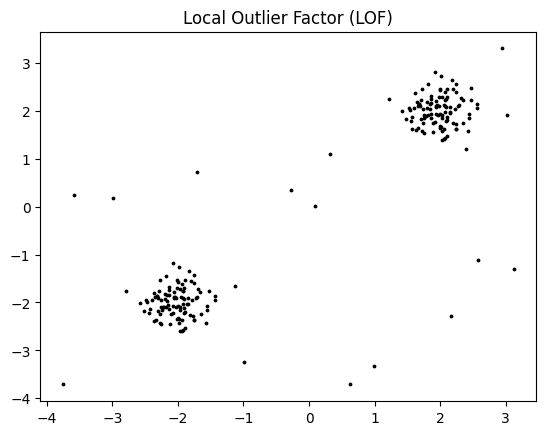

In [21]:
plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points

radius es una variable entre 0 y 1, que tiene la misma dimension que la matriz x_score
valores cercanos a 0= puntos normales
valores cercanos a 1= puntos muy raros (outliers)

In [22]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

sc_circles es para establecer los radios de los puntos
plt.scatter es para graficas y dar las caracteristicas del grafico

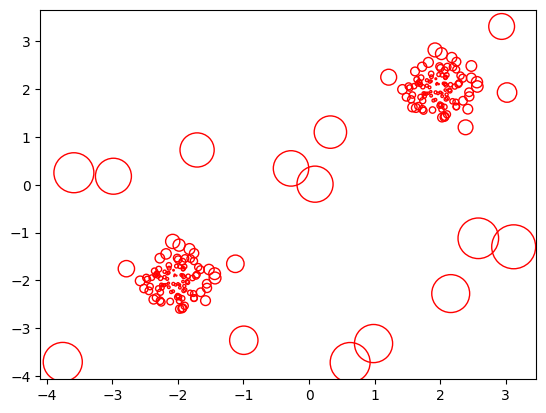

In [23]:
sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles

Este codigo sirve para graficar los puntos, los radios de los puntos y poner las leyendas la grafico

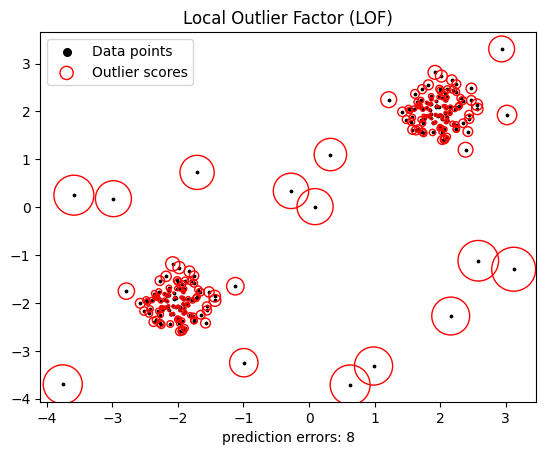

In [24]:
plt.title("Local Outlier Factor (LOF)")


sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)


radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)


plt.autoscale()

plt.xlabel(f"prediction errors: {n_errors}")


leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')

leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

plt.show()